In [9]:
import numpy as np
import scipy.stats as stats
import pandas as pd 

In [11]:
# Эмпирическая матрица наблюдаемых переходов (2016-2024)
# Определяем названия рейтингов
ratings = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC", "D"]

N = np.array([
    [120, 15, 5, 2, 1, 0, 0, 0], 
    [10, 100, 20, 5, 2, 1, 0, 1], 
    [5, 15, 90, 30, 10, 3, 1, 2], 
    [3, 5, 25, 80, 30, 8, 3, 5], 
    [1, 2, 8, 20, 60, 20, 5, 10], 
    [0, 1, 3, 8, 15, 50, 10, 13], 
    [0, 0, 1, 3, 5, 15, 30, 20], 
    [0, 0, 0, 0, 0, 0, 0, 100]
])



In [13]:
# Неинформативный априор (равномерный)
alpha = np.ones(N.shape[1])

# Вычисляем апостериорные параметры
posterior_params = N + alpha

# Генерируем вероятностные матрицы переходов из апостериорного распределения
num_samples = 1000  # Количество выборок
samples = np.array([stats.dirichlet.rvs(posterior_params[i], size=num_samples) for i in range(N.shape[0])])

# Оценим среднюю матрицу переходов
P_estimated = samples.mean(axis=1)

print("Байесовская оценка матрицы миграции рейтингов:")
print(P_estimated)

Байесовская оценка матрицы миграции рейтингов:
[[0.8032444  0.1049101  0.03966277 0.0194491  0.0129513  0.00670057
  0.00651421 0.00656755]
 [0.07545457 0.6863206  0.14349883 0.04016749 0.0206851  0.01335402
  0.00702915 0.01349024]
 [0.0362957  0.09679409 0.55621567 0.18978497 0.06641026 0.02457604
  0.01172352 0.01819976]
 [0.02390403 0.03540624 0.15482512 0.48515196 0.18750576 0.05317023
  0.02405022 0.03598644]
 [0.01501945 0.02223505 0.06753587 0.15674091 0.45336691 0.15752835
  0.04500268 0.08257077]
 [0.00938066 0.01845023 0.03697558 0.0834301  0.14601145 0.47503229
  0.10132811 0.12939158]
 [0.0127156  0.01271741 0.02411313 0.04881121 0.0729518  0.19200849
  0.37888864 0.25779371]
 [0.0092888  0.00998355 0.00981056 0.00907349 0.00907639 0.00887308
  0.00892546 0.93496867]]


In [19]:
# Создаем DataFrame
df_P = pd.DataFrame(P_estimated, index=ratings, columns=ratings)

# Выводим DataFrame
print("Байесовская оценка матрицы миграции рейтингов:")
print(df_P)

Байесовская оценка матрицы миграции рейтингов:
          AAA        AA         A       BBB        BB         B       CCC  \
AAA  0.803244  0.104910  0.039663  0.019449  0.012951  0.006701  0.006514   
AA   0.075455  0.686321  0.143499  0.040167  0.020685  0.013354  0.007029   
A    0.036296  0.096794  0.556216  0.189785  0.066410  0.024576  0.011724   
BBB  0.023904  0.035406  0.154825  0.485152  0.187506  0.053170  0.024050   
BB   0.015019  0.022235  0.067536  0.156741  0.453367  0.157528  0.045003   
B    0.009381  0.018450  0.036976  0.083430  0.146011  0.475032  0.101328   
CCC  0.012716  0.012717  0.024113  0.048811  0.072952  0.192008  0.378889   
D    0.009289  0.009984  0.009811  0.009073  0.009076  0.008873  0.008925   

            D  
AAA  0.006568  
AA   0.013490  
A    0.018200  
BBB  0.035986  
BB   0.082571  
B    0.129392  
CCC  0.257794  
D    0.934969  


In [21]:
# Фактические вероятности переходов (нормируем строки)
P_actual = N / N.sum(axis=1, keepdims=True)

# Создаем DataFrame
df_P_actual = pd.DataFrame(P_actual, index=ratings, columns=ratings)

# Выводим результат
print("Фактические вероятности переходов:")
print(df_P_actual)


Фактические вероятности переходов:
          AAA        AA         A       BBB        BB         B       CCC  \
AAA  0.839161  0.104895  0.034965  0.013986  0.006993  0.000000  0.000000   
AA   0.071942  0.719424  0.143885  0.035971  0.014388  0.007194  0.000000   
A    0.032051  0.096154  0.576923  0.192308  0.064103  0.019231  0.006410   
BBB  0.018868  0.031447  0.157233  0.503145  0.188679  0.050314  0.018868   
BB   0.007937  0.015873  0.063492  0.158730  0.476190  0.158730  0.039683   
B    0.000000  0.010000  0.030000  0.080000  0.150000  0.500000  0.100000   
CCC  0.000000  0.000000  0.013514  0.040541  0.067568  0.202703  0.405405   
D    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            D  
AAA  0.000000  
AA   0.007194  
A    0.012821  
BBB  0.031447  
BB   0.079365  
B    0.130000  
CCC  0.270270  
D    1.000000  


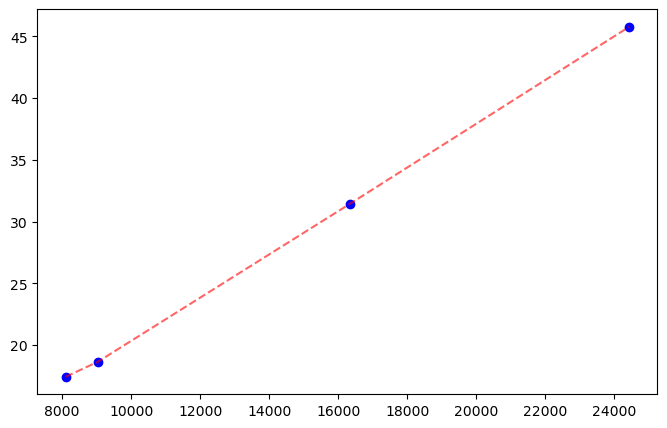

In [29]:
import matplotlib.pyplot as plt

# Данные
dataset_sizes = [8101, 9031, 16347, 24437]  # Размеры датасетов
execution_times = [17.4480, 18.6582, 31.4573, 45.7740]  # Время выполнения (сек)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


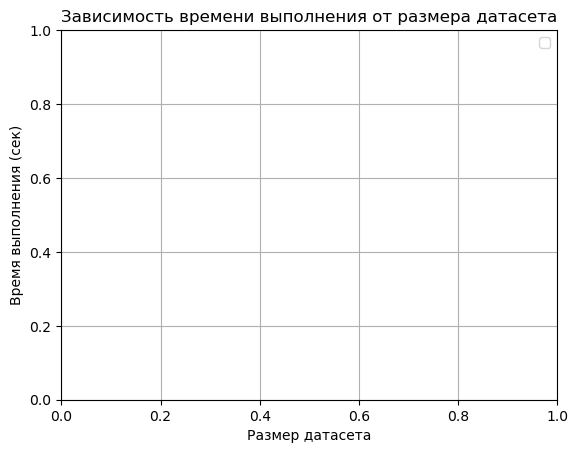

In [39]:

# Оформление
plt.xlabel("Размер датасета")
plt.ylabel("Время выполнения (сек)")
plt.title("Зависимость времени выполнения от размера датасета")
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

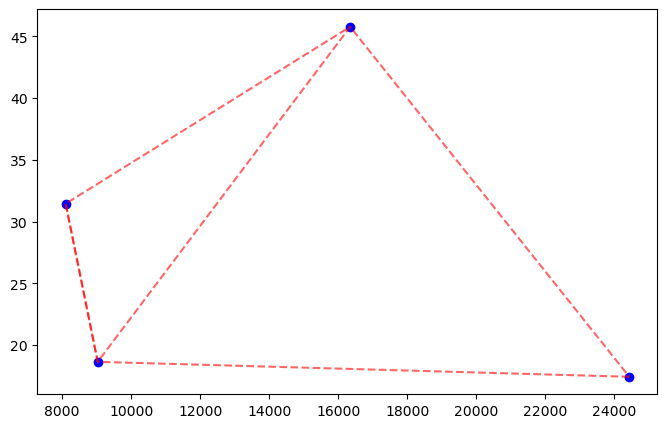

In [47]:
# Новые данные
dataset_sizes_2 = [24437, 9031, 8101, 16347]
execution_times_2 = [14.7884, 6.1918, 5.6047, 11.3659]
# Данные
dataset_sizes_1 = [8101, 9031, 16347, 24437]  # Размеры датасетов
execution_times = [17.4480, 18.6582, 31.4573, 45.7740]  # Время выполнения (сек)
# Сортировка данных по размеру датасета
sorted_data = sorted(zip(dataset_sizes, execution_times))
dataset_sizes_sorted, execution_times_sorted = zip(*sorted_data)

# Создание графика
plt.figure(figsize=(8, 5))
plt.scatter(dataset_sizes_sorted, execution_times_sorted, color='b', label='Замеры времени')
plt.plot(dataset_sizes_sorted, execution_times_sorted, linestyle='dashed', color='r', alpha=0.6, label='Тренд')
plt.plot(dataset_sizes, execution_times, linestyle='dashed', color='r', alpha=0.6, label='Тренд')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


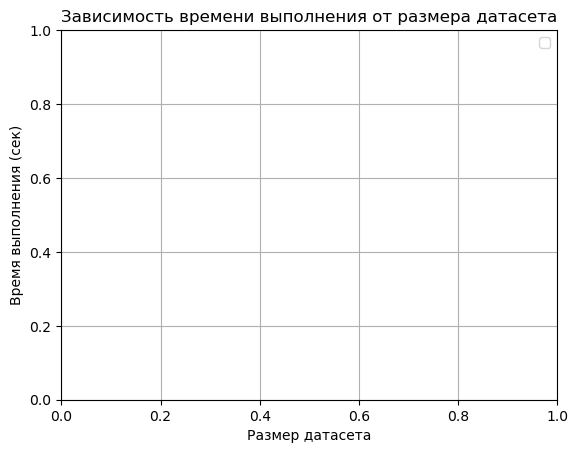

In [45]:

# Оформление
plt.xlabel("Размер датасета")
plt.ylabel("Время выполнения (сек)")
plt.title("Зависимость времени выполнения от размера датасета")
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

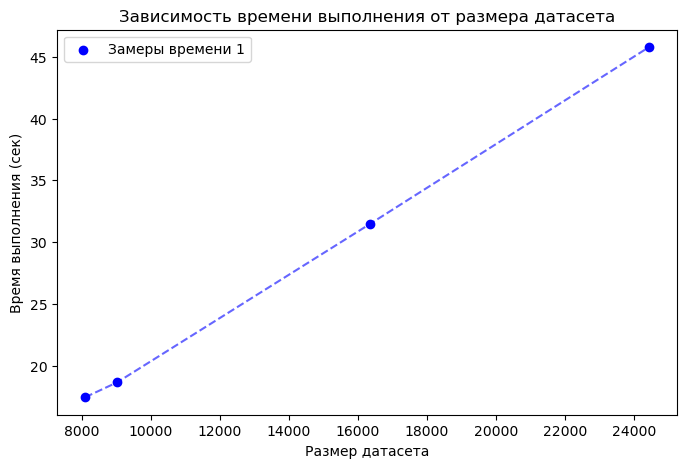

In [55]:
import matplotlib.pyplot as plt

# Данные 1
dataset_sizes_1 = [8101, 9031, 16347, 24437]  
execution_times_1 = [17.4480, 18.6582, 31.4573, 45.7740]

# Данные 2
dataset_sizes_2 = [24437, 9031, 8101, 16347]
execution_times_2 = [14.7884, 6.1918, 5.6047, 11.3659]

# Сортировка второго набора данных
sorted_data_2 = sorted(zip(dataset_sizes_2, execution_times_2))
dataset_sizes_sorted_2, execution_times_sorted_2 = zip(*sorted_data_2)

# Создание графика
plt.figure(figsize=(8, 5))

# Линии тренда
plt.plot(dataset_sizes_1, execution_times_1, linestyle='dashed', color='b', alpha=0.6)
# plt.plot(dataset_sizes_sorted_2, execution_times_sorted_2, linestyle='dashed', color='r', alpha=0.6, label='Тренд 2')

# Точки данных
plt.scatter(dataset_sizes_1, execution_times_1, color='b', marker='o', label='Замеры времени 1')
# plt.scatter(dataset_sizes_2, execution_times_2, color='r', marker='x', label='Замеры времени 2')

# Подписи осей и заголовок
plt.xlabel("Размер датасета")
plt.ylabel("Время выполнения (сек)")
plt.title("Зависимость времени выполнения от размера датасета")

# Легенда
plt.legend()

# Отображение графика
plt.show()


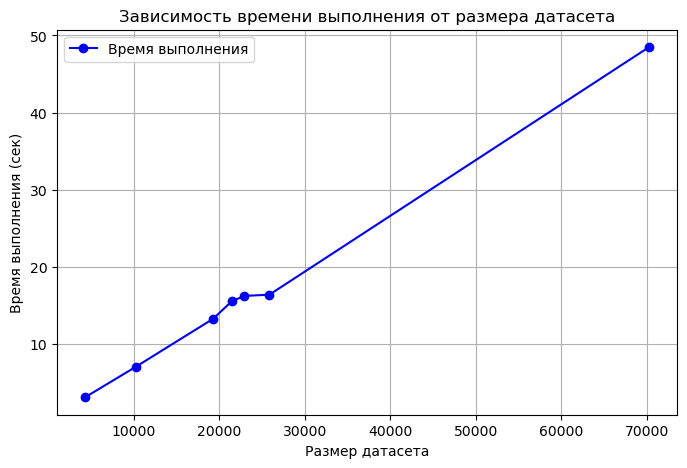

In [70]:
# Данные
dataset_sizes = [21439, 19306, 22909, 25865, 4340, 70213, 10249]
execution_times = [15.5046, 13.2705, 16.2277, 16.3840, 3.0894, 48.4750,  7.0308]

# Сортировка данных по размеру датасета
sorted_data = sorted(zip(dataset_sizes, execution_times))
dataset_sizes_sorted, execution_times_sorted = zip(*sorted_data)

# Создание графика
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes_sorted, execution_times_sorted, marker='o', linestyle='-', color='b', label='Время выполнения')
plt.xlabel('Размер датасета')
plt.ylabel('Время выполнения (сек)')
plt.title('Зависимость времени выполнения от размера датасета')
plt.grid(True)
plt.legend()


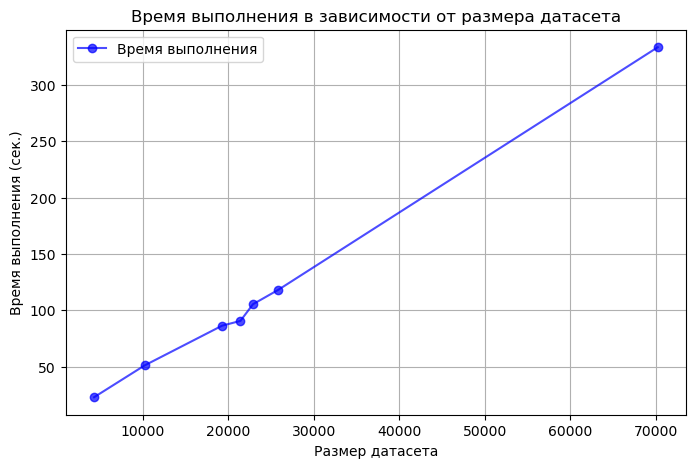

In [72]:
# Новые данные
dataset_sizes_3 = [21439, 25865, 10249, 70213, 4340, 22909, 19306]
execution_times_3 = [90.656, 118.1997, 51.2191, 333.2502, 23.0229, 105.4563, 86.45631]

# Сортировка данных по размеру датасета
sorted_data_3 = sorted(zip(dataset_sizes_3, execution_times_3))
dataset_sizes_sorted_3, execution_times_sorted_3 = zip(*sorted_data_3)

# Создание графика
plt.figure(figsize=(8, 5))
plt.plot(dataset_sizes_sorted_3, execution_times_sorted_3, marker='o', color='b', label='Время выполнения', alpha=0.7)
plt.title("Время выполнения в зависимости от размера датасета")
plt.xlabel("Размер датасета")
plt.ylabel("Время выполнения (сек.)")
plt.legend()
plt.grid(True)
plt.show()


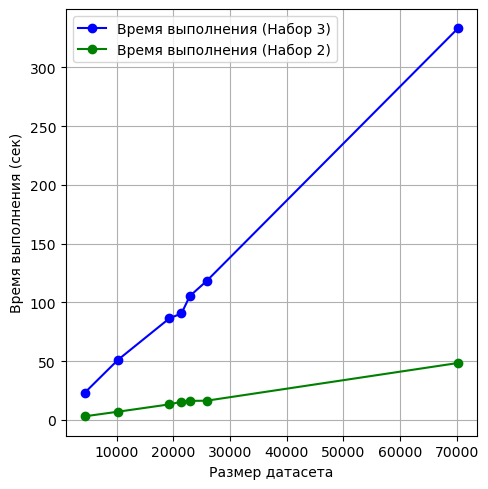

In [78]:
# Данные для двух наборов
dataset_sizes_3 = [21439, 25865, 10249, 70213, 4340, 22909, 19306]
execution_times_3 = [90.656, 118.1997, 51.2191, 333.2502, 23.0229, 105.4563, 86.45631]

dataset_sizes = [21439, 19306, 22909, 25865, 4340, 70213, 10249]
execution_times = [15.5046, 13.2705, 16.2277, 16.3840, 3.0894, 48.4750, 7.0308]

# Сортировка данных по размеру датасета
sorted_data_3 = sorted(zip(dataset_sizes_3, execution_times_3))
dataset_sizes_sorted_3, execution_times_sorted_3 = zip(*sorted_data_3)

sorted_data = sorted(zip(dataset_sizes, execution_times))
dataset_sizes_sorted, execution_times_sorted = zip(*sorted_data)

# Построение графиков
plt.figure(figsize=(5, 5))

# График 1
plt.plot(dataset_sizes_sorted_3, execution_times_sorted_3, marker='o', color='b', label='Время выполнения (Набор 3)')
# График 2
plt.plot(dataset_sizes_sorted, execution_times_sorted, marker='o', color='g', label='Время выполнения (Набор 2)')
plt.xlabel('Размер датасета')
plt.ylabel('Время выполнения (сек)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
# Вычисление относительного ускорения
speed_up = np.array(sorted_data_3) / np.array(sorted_data)
speed_up

array([[1.        , 7.45222373],
       [1.        , 7.28496046],
       [1.        , 6.51492483],
       [1.        , 5.84703894],
       [1.        , 6.49853645],
       [1.        , 7.21433716],
       [1.        , 6.87468179]])

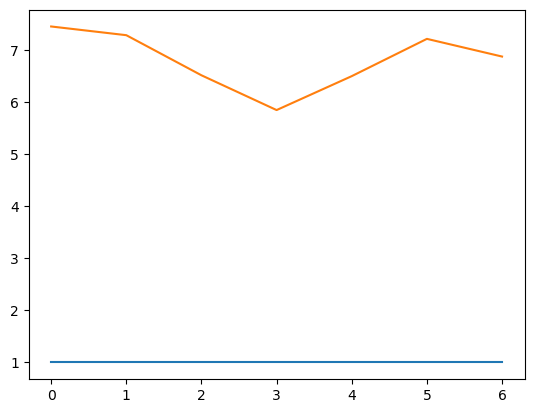

In [90]:
plt.plot(speed_up)